In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

## General Performance

In [2]:
# load general_performance.csv in a dataframe
df_gp = pd.read_csv("general_performance.csv")
# rename columns Unnamed: 0 to ""
df_gp = df_gp.rename(columns={"Unnamed: 0": ""})
# set index to ""
df_gp = df_gp.set_index("")
df_gp

,c,python,java
,,,
initialize,1.142081,0.884775,6.562444
compile,0.064044,0.000000,0.935776
load_code,0.009491,0.144544,0.020249
execute,0.189393,3.254141,1.292849


## Load code performance

Text(0, 0.5, 'Time (s)')

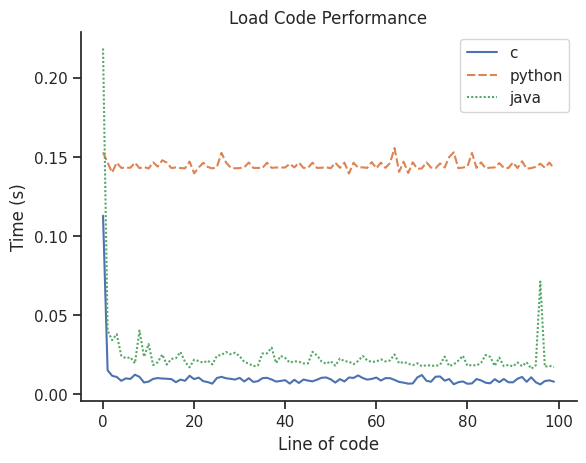

In [3]:
df_lcp = pd.read_csv("load_code_performance.csv")
# drop first column
df_lcp = df_lcp.drop(columns=["Unnamed: 0"])
sns.lineplot(data=df_lcp)
plt.title("Load Code Performance")
plt.xlabel("Line of code")
plt.ylabel("Time (s)")

## Execute code performance

Text(0, 0.5, 'Time (s)')

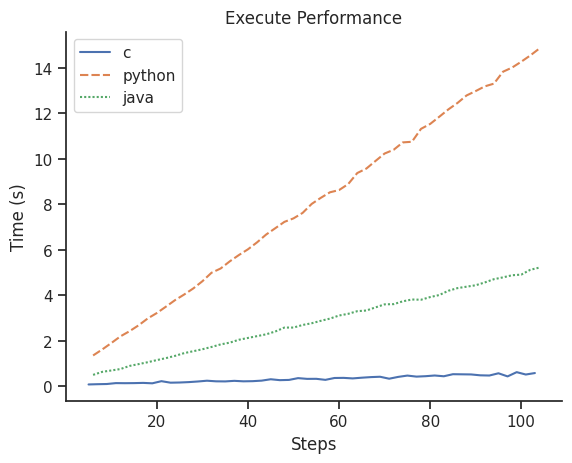

In [4]:
df_ep = pd.read_csv("execute_performance.csv")
# rename columns Unnamed: 0 to steps
df_ep = df_ep.rename(columns={"Unnamed: 0": "steps"})
# set index to steps
df_ep = df_ep.set_index("steps")
sns.lineplot(data=df_ep)
plt.title("Execute Performance")
plt.xlabel("Steps")
plt.ylabel("Time (s)")

Text(0, 0.5, 'Time (s)')

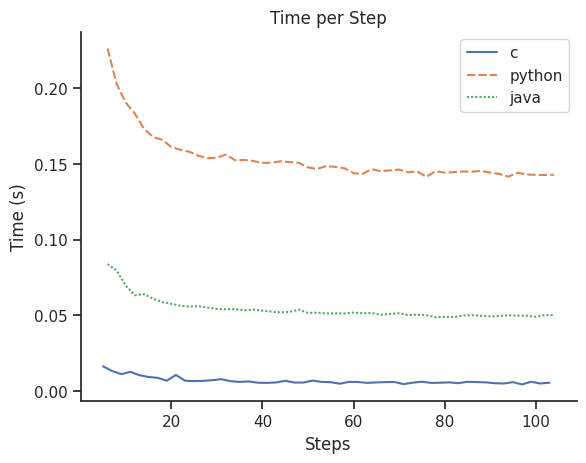

In [5]:
#time per step
df_tps = df_ep.copy()
df_tps.index = df_tps.index.astype(int)
df_tps = df_tps.div(df_tps.index, axis=0)
sns.lineplot(data=df_tps)
plt.title("Time per Step")
plt.xlabel("Steps")
plt.ylabel("Time (s)")

## Binary Search Scenario

In [6]:
import json
with open("scenario/binary_search_c_times.json", 'r') as file:
    bsc_data = json.load(file)

with open("scenario/binary_search_python_times.json", 'r') as file:
    bspy_data = json.load(file)
    
with open("scenario/binary_search_java_times.json", 'r') as file:
    bsj_data = json.load(file)

In [31]:
def plot_scenario(data):
    df_bsc_data = pd.DataFrame(data).T
    # make index as int and column
    df_bsc_data.index = df_bsc_data.index.astype(int)
    #plot the exec time on y axi on the left and step on y axis on the right
    g = sns.lineplot(data=df_bsc_data["exec"], color="red")
    plt.ylabel("Time (s)")
    # plot step on y axis on the right
    sns.lineplot(data=df_bsc_data["step"], ax=g.twinx(), color="blue")
    # x axis step in int
    plt.xlabel("Versions")
    plt.ylabel("Stack Recording Size")
    # make the tick on x axis int and not float
    g.xaxis.set_major_locator(plt.MaxNLocator(10))
    # add labels (blue = tim and red = size)
    plt.legend(labels=["Time", "Stack Recording Size"])

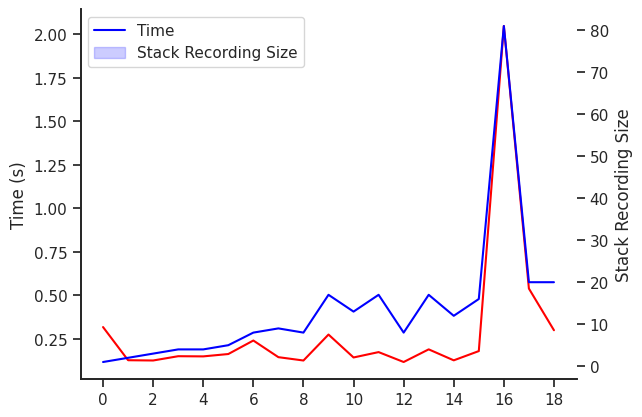

In [32]:
plot_scenario(bsc_data["scenario"])

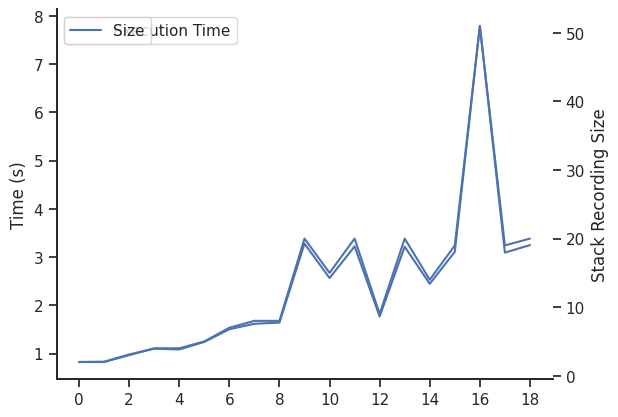

In [27]:
plot_scenario(bspy_data["scenario"])

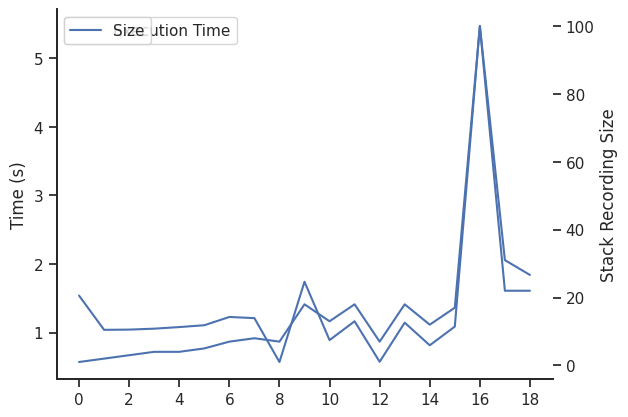

In [28]:
plot_scenario(bsj_data["scenario"])